# 5.2. Using convnets with small datasets

Importing all the stuff

In [1]:
import os, shutil
import json

import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


Reading the data

In [2]:
create_dirs = False
copy_images = False

In [3]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/mateusztybura/Downloads/dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/mateusztybura/Downloads/dogs-vs-cats-small'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

if create_dirs:
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(validation_dir)
    os.mkdir(test_dir)
    os.mkdir(train_cats_dir)
    os.mkdir(train_dogs_dir)
    os.mkdir(validation_cats_dir)
    os.mkdir(validation_dogs_dir)
    os.mkdir(test_cats_dir)
    os.mkdir(test_dogs_dir)
    
if copy_images:
    # Copy first 1000 cat images to train_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)

    # Copy next 500 cat images to validation_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)

    # Copy next 500 cat images to test_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)

    # Copy first 1000 dog images to train_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)

    # Copy next 500 dog images to validation_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)

    # Copy next 500 dog images to test_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)

Checking out the data

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Building model

In [5]:
small_model_path = 'cats_and_dogs_small_1.h5'
small_history_path = 'cats_and_dogs_small_1.history'

In [6]:
small_model_exists = os.path.exists(small_model_path)
small_history_exists = os.path.exists(small_history_path)

In [7]:
model = None

if small_model_exists:
    model = load_model(small_model_path)
else:
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Looking at the model

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

Preparing the model

In [9]:
if not small_model_exists:
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['acc'])

Data preprocessing

In [10]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Model training

In [12]:
history = None

if small_history_exists:
    with open(small_history_path, 'r') as json_file:
        history = json.load(json_file)
else:
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)
    with open(small_history_path, 'w') as json_file:
        json.dump(history.history, json_file)

Saving trained model

In [13]:
if not small_model_exists:
    model.save(small_model_path)

Plotting accuracy and loss

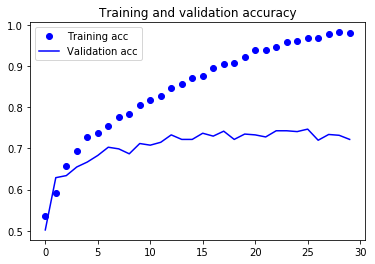

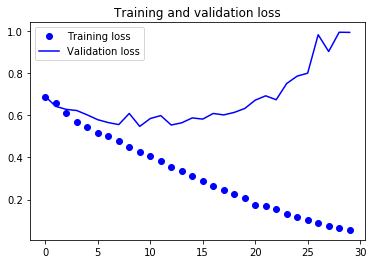

In [14]:
acc = history['acc'] if small_history_exists else history.history['acc']
val_acc = history['val_acc'] if small_history_exists else history.history['val_acc']
loss = history['loss'] if small_history_exists else history.history['loss']
val_loss = history['val_loss'] if small_history_exists else history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Data augmentation

In [15]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Example of image augmentation

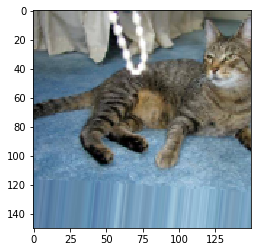

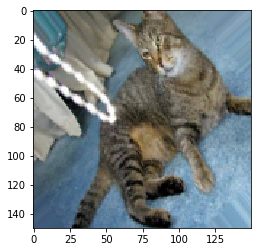

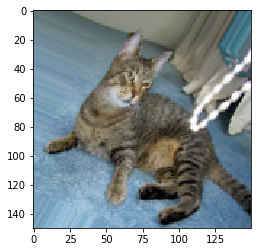

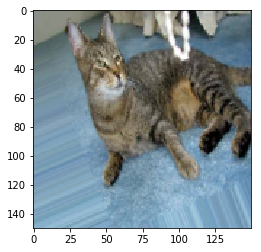

In [16]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Brand new model

In [17]:
aug_model_path = 'cats_and_dogs_small_2.h5'
aug_history_path = 'cats_and_dogs_small_2.history'

In [18]:
aug_model_exists = os.path.exists(aug_model_path)
aug_history_exists = os.path.exists(aug_history_path)

In [19]:
model = None

if aug_model_exists:
    model = load_model(aug_model_path)
else:
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Training new model

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = None
if aug_history_exists:
    with open(aug_history_path, 'r') as json_file:
        history = json.load(json_file)
else:
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)
    with open(aug_history_path, 'w') as json_file:
        json.dump(history.history, json_file)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 156s 2s/step - loss: 0.6908 - acc: 0.5303 - val_loss: 0.6797 - val_acc: 0.5933
Epoch 2/100
100/100 [==============================] - 152s 2s/step - loss: 0.6799 - acc: 0.5594 - val_loss: 0.6583 - val_acc: 0.5863
Epoch 3/100
100/100 [==============================] - 152s 2s/step - loss: 0.6706 - acc: 0.5806 - val_loss: 0.6487 - val_acc: 0.6282
Epoch 4/100
100/100 [==============================] - 150s 1s/step - loss: 0.6543 - acc: 0.6125 - val_loss: 0.6239 - val_acc: 0.6482
Epoch 5/100
100/100 [==============================] - 155s 2s/step - loss: 0.6457 - acc: 0.6134 - val_loss: 0.6487 - val_acc: 0.6206
Epoch 6/100
100/100 [==============================] - 151s 2s/step - loss: 0.6335 - acc: 0.6338 - val_loss: 0.6033 - val_acc: 0.6688
Epoch 7/100
100/100 [==============================] - 153s 2s/step - loss: 0.6214 - acc: 0.6456 - val_loss: 0.5

100/100 [==============================] - 150s 2s/step - loss: 0.4501 - acc: 0.7903 - val_loss: 0.4841 - val_acc: 0.7758
Epoch 62/100
100/100 [==============================] - 150s 1s/step - loss: 0.4497 - acc: 0.7853 - val_loss: 0.5067 - val_acc: 0.7614
Epoch 63/100
100/100 [==============================] - 149s 1s/step - loss: 0.4381 - acc: 0.7953 - val_loss: 0.4220 - val_acc: 0.8028
Epoch 64/100
100/100 [==============================] - 150s 1s/step - loss: 0.4440 - acc: 0.7881 - val_loss: 0.4824 - val_acc: 0.7803
Epoch 65/100
100/100 [==============================] - 150s 2s/step - loss: 0.4340 - acc: 0.8041 - val_loss: 0.4663 - val_acc: 0.7805
Epoch 66/100
100/100 [==============================] - 150s 1s/step - loss: 0.4275 - acc: 0.7997 - val_loss: 0.4647 - val_acc: 0.7912
Epoch 67/100
100/100 [==============================] - 150s 2s/step - loss: 0.4318 - acc: 0.7991 - val_loss: 0.4408 - val_acc: 0.8033
Epoch 68/100
100/100 [==============================] - 150s 1s/step

Saving model

In [21]:
if not aug_model_exists:
    model.save('cats_and_dogs_small_2.h5')

Plotting results

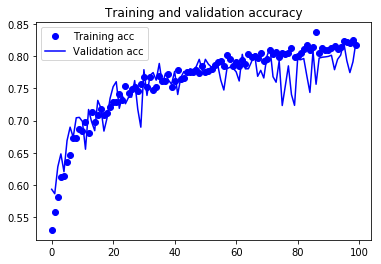

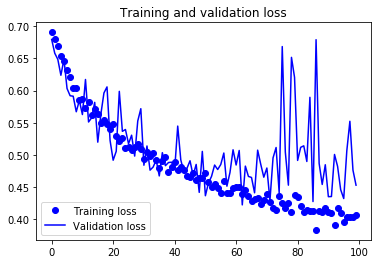

In [22]:
acc = history['acc'] if aug_history_exists else history.history['acc']
val_acc = history['val_acc'] if aug_history_exists else history.history['val_acc']
loss = history['loss'] if aug_history_exists else history.history['loss']
val_loss = history['val_loss'] if aug_history_exists else history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()